# **Planetary System Classifier**

Solar Planetary System is to be conceived beyond space and time. It encompasses many galaxies, stars, planets, planetary systems, moons, asteroid belts, and terrestrial bodies.  
Sun is the prime controller of the Solar System formed out of a giant rotating cloud (nebula) of gas and dust parties.  
Our solar system consists of our star, the Sun, and everything bound to it by gravity – the planets Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune; dwarf planets such as Pluto; dozens of moons; and millions of asteroids, comets, and meteoroids



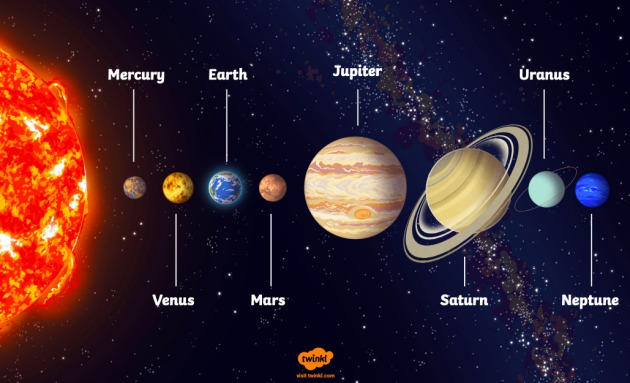

**Dataset**  
The Planets and Moons dataset consists of approximately 8 confirmed planets, 2 dwarf planets, and 1 Earth's moon, the Moon. It includes 11 classes in total.

There are 149 photos of each planet in 3D. All photos are optimized and ready for convolution for AI applications



In [ ]:
#!nvidia-smi

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.8.2


## **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras


In [ ]:
import keras

## **Downloading the Data**

In [ ]:
! unzip '/content/drive/MyDrive/Planetary image classifier/Planets_Moons_Data.zip'

Archive:  /content/drive/MyDrive/Planetary image classifier/Planets_Moons_Data.zip
   creating: Planets and Moons/
   creating: Planets and Moons/Earth/
  inflating: Planets and Moons/Earth/Earth (1).jpg  
  inflating: Planets and Moons/Earth/Earth (10).jpg  
  inflating: Planets and Moons/Earth/Earth (100).jpg  
  inflating: Planets and Moons/Earth/Earth (101).jpg  
  inflating: Planets and Moons/Earth/Earth (102).jpg  
  inflating: Planets and Moons/Earth/Earth (103).jpg  
  inflating: Planets and Moons/Earth/Earth (104).jpg  
  inflating: Planets and Moons/Earth/Earth (105).jpg  
  inflating: Planets and Moons/Earth/Earth (106).jpg  
  inflating: Planets and Moons/Earth/Earth (107).jpg  
  inflating: Planets and Moons/Earth/Earth (108).jpg  
  inflating: Planets and Moons/Earth/Earth (109).jpg  
  inflating: Planets and Moons/Earth/Earth (11).jpg  
  inflating: Planets and Moons/Earth/Earth (110).jpg  
  inflating: Planets and Moons/Earth/Earth (111).jpg  
  inflating: Planets and M

## **Importing necessary libraries**

In [ ]:
import os
import glob
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")


2.8.2


In [ ]:
DATASET = "Planets and Moons"  # this folde must contain three subfolder with images
MODEL = "Planetary.model" # name to store the model on disk
PLOT = "plot.jpg" # plot name

In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(DATASET)))
random.seed()
random.shuffle(imagePaths)

[INFO] loading images...


In [ ]:
# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (48, 48))
        image = img_to_array(image)
        data.append(image)

  0%|          | 0/1638 [00:00<?, ?it/s]

## **Data Preparation**

In [ ]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=False,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None,
    validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="training")

Found 1319 images belonging to 11 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory("/content/Planets and Moons",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos",
                                                    subset="validation")

Found 319 images belonging to 11 classes.


In [ ]:
def planetary_model():
  inp = Input(shape = (256,256,3))

  x = Conv2D(128, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(inp)
  x = BatchNormalization()(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(256, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Conv2D(512, (2,2), strides=(2,2), padding='same', activation='ReLU', use_bias=True)(x)
  x = SpatialDropout2D(0.2)(x)
  x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
  x = Flatten()(x)
  x = Dense(128, activation='ReLU')(x)
  x = Dense(11, activation='softmax')(x)

  model = Model(inputs=inp, outputs= x)
  return model


In [ ]:
from tensorflow.keras.layers import *

In [ ]:
def planetary_func(name_model):

    print('#####~Model => {} '.format(name_model))

    model = planetary_model()
    model.summary()

    model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
    my_callbacks  =  [keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")]
    
    history = model.fit(train_generator,
                        validation_data=test_generator,
                        epochs=48,
                        callbacks=my_callbacks,
                        verbose=1,
                        batch_size=128,)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()

    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]
    
    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results

In [ ]:
def func(pre,name_model):
    print('#####~Model => {} '.format(name_model))
    pre_model = name_model(input_shape=(256,256, 3),
                   include_top=False,
                   weights='imagenet',
                   pooling='avg')
    pre_model.trainable = False
    inputs = pre_model.input
    x = Dense(64, activation='relu')(pre_model.output)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(11, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
    my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              mode='auto')]

    history = model.fit(train_generator,validation_data=test_generator,epochs=48,callbacks=my_callbacks,verbose=0)
    # Plotting Accuracy, val_accuracy, loss, val_loss
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax = ax.ravel()

    for i, met in enumerate(['accuracy', 'loss']):
        ax[i].plot(history.history[met])
        ax[i].plot(history.history['val_' + met])
        ax[i].set_title('Model {}'.format(met))
        ax[i].set_xlabel('epochs')
        ax[i].set_ylabel(met)
        ax[i].legend(['Train', 'Validation'])
    plt.show()
    
    # Predict Data Test
    pred = model.predict(test_generator)
    pred = np.argmax(pred,axis=1)
    labels = (train_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    pred = [labels[k] for k in pred]

    print('\033[01m              Classification_report \033[0m')
    
    print('\033[01m              Results \033[0m')
    # Results
    results = model.evaluate(test_generator, verbose=0)
    print("    Test Loss:\033[31m \033[01m {:.5f} \033[30m \033[0m".format(results[0]))
    print("Test Accuracy:\033[32m \033[01m {:.2f}% \033[30m \033[0m".format(results[1] * 100))
    
    return results                          

In [ ]:
from tensorflow.keras.models import Model

## **Structure of the Model**

#####~Model => Planetary_Sysytem_Artificial_Intelligence 
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     1664      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 spatial_dropout2d (SpatialD  (None, 128, 128, 128)    0         
 ropout2D)                                                       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
   

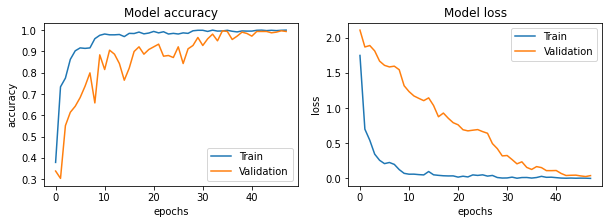

              Classification_report 
              Results 
    Test Loss:  0.03727  
Test Accuracy:  99.69%  


In [ ]:
model_name = "Planetary_Sysytem_Artificial_Intelligence"
result_model = planetary_func(model_name)

# **VGG19**
VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer). There are other variants of VGG like VGG11, VGG16 and others.

#####~Model => <function VGG19 at 0x7f29feb38e60> 
80150528/80134624 [==============================] - 1s 0us/step


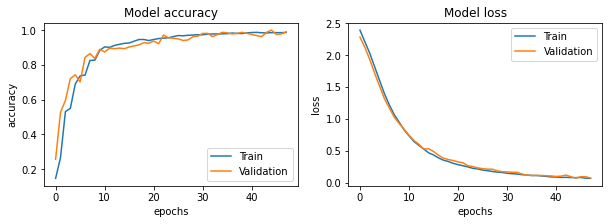

              Classification_report 
              Results 
    Test Loss:  0.06737  
Test Accuracy:  99.06%  


In [ ]:
from tensorflow.keras.applications import VGG19 
from tensorflow.keras.applications.vgg19 import preprocess_input
result_VGG19 = func(preprocess_input,VGG19)

# **ResNet50**
Deep residual networks like the popular ResNet-50 model is a convolutional neural network (CNN) that is 50 layers deep. A Residual Neural Network (ResNet) is an Artificial Neural Network (ANN) of a kind that stacks residual blocks on top of each other to form a network.

#####~Model => <function ResNet50 at 0x7f29feb329e0> 
94781440/94765736 [==============================] - 1s 0us/step


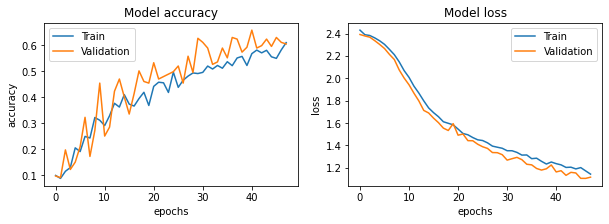

              Classification_report 
              Results 
    Test Loss:  1.07808  
Test Accuracy:  63.32%  


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
result_ResNet50 = func(preprocess_input,ResNet50)

# **ResNet101**
ResNet-101 is a convolutional neural network that is 101 layers deep.

#####~Model => <function ResNet101 at 0x7f29feb32a70> 
171458560/171446536 [==============================] - 7s 0us/step


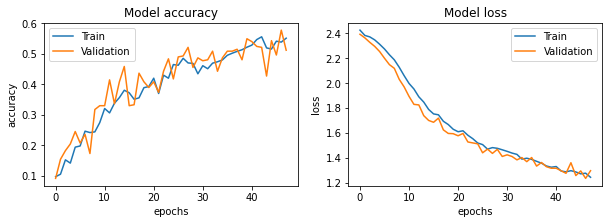

              Classification_report 
              Results 
    Test Loss:  1.31490  
Test Accuracy:  50.16%  


In [24]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
result_ResNet101 = func(preprocess_input,ResNet101)

# **MobileNet**
As the name applied, the MobileNet model is designed to be used in mobile applications, and it is TensorFlow’s first mobile computer vision model.

MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters when compared to the network with regular convolutions with the same depth in the nets. This results in lightweight deep neural networks.

#####~Model => <function MobileNet at 0x7f29feb96830> 
17235968/17225924 [==============================] - 2s 0us/step


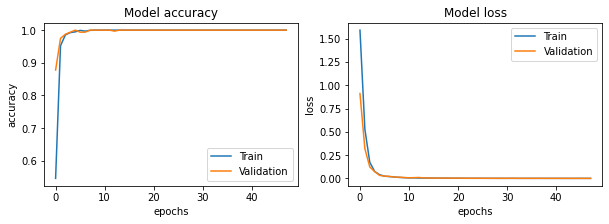

              Classification_report 
              Results 
    Test Loss:  0.00113  
Test Accuracy:  100.00%  


In [25]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
result_MobileNet = func(preprocess_input,MobileNet)

# **DenseNet201**
DenseNet is one of the new discoveries in neural networks for visual object recognition. DenseNet is quite similar to ResNet with some fundamental differences. ResNet uses an additive method (+) that merges the previous layer (identity) with the future layer, whereas DenseNet concatenates (.) the output of the previous layer with the future layer. 

#####~Model => <function DenseNet201 at 0x7f29feb777a0> 
74850304/74836368 [==============================] - 2s 0us/step


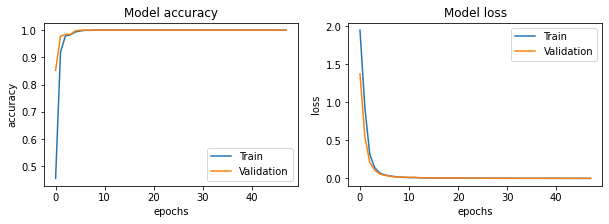

              Classification_report 
              Results 
    Test Loss:  0.00147  
Test Accuracy:  100.00%  


In [26]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
result_DenseNet201 = func(preprocess_input,DenseNet201)

# **EfficientNetB7**

#####~Model => <function EfficientNetB7 at 0x7f29feb80950> 
258088960/258076736 [==============================] - 6s 0us/step


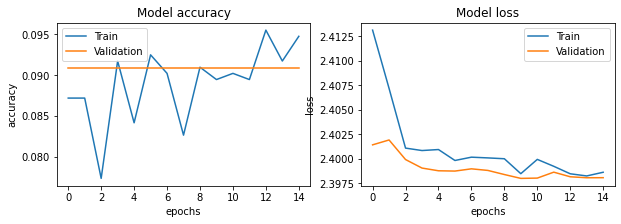

              Classification_report 
              Results 
    Test Loss:  2.39807  
Test Accuracy:  9.09%  


In [27]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
result_Eff = func(preprocess_input,EfficientNetB7)

# **Xception**
Xception is a deep convolutional neural network architecture that involves Depthwise Separable Convolutions.



#####~Model => <function Xception at 0x7f29feb3f3b0> 
83697664/83683744 [==============================] - 2s 0us/step


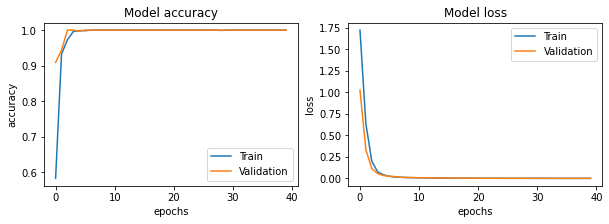

              Classification_report 
              Results 
    Test Loss:  0.00090  
Test Accuracy:  100.00%  


In [28]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
result_Xception = func(preprocess_input,Xception)

## **InceptionResNetV2**
Inception-ResNet-v2 is a convolutional neural network that is trained on more than a million images from the ImageNet database. The network is 164 layers deep and can classify images into 1000 object categories, such as the keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 299-by-299, and the output is a list of estimated class probabilities.

#####~Model => <function InceptionResNetV2 at 0x7f29feb904d0> 
219070464/219055592 [==============================] - 4s 0us/step


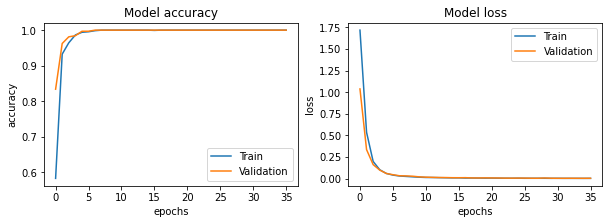

              Classification_report 
              Results 
    Test Loss:  0.00259  
Test Accuracy:  100.00%  


In [29]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
result_InResNetV2 = func(preprocess_input,InceptionResNetV2)

## **Final Result Table**

In [30]:
accuracy_table = pd.DataFrame({'Model':['Planetary_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Accuracy':[result_model[1],result_VGG19[1], result_VGG19[1], result_ResNet50[1], result_ResNet101[1],
                                  result_MobileNet[1],result_InResNetV2[1],result_DenseNet201[1],result_Xception[1],
                                 result_Eff[1]]})

In [31]:
accuracy_table

,Model,Accuracy
0,Planetary_Model,0.996865
1,VGG16,0.990596
2,VGG19,0.990596
3,ResNet50,0.633229
4,ResNet101,0.501567
5,MobileNet,1.000000
6,InceptionResNetV2,1.000000
7,DenseNet201,1.000000
8,Xception,1.000000
9,EfficientNetB7,0.090909


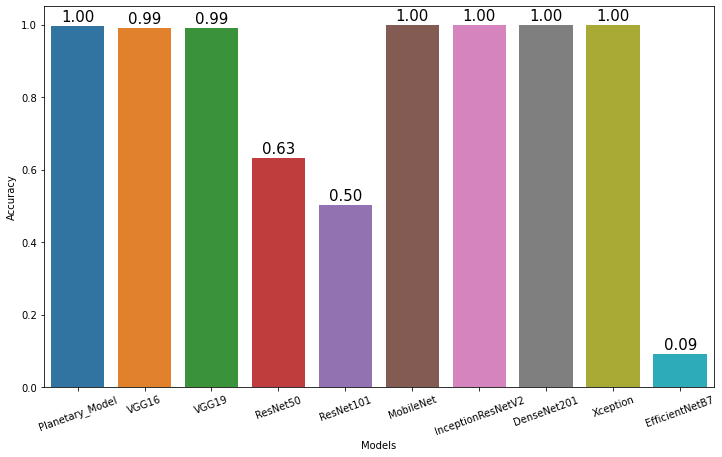

In [32]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=accuracy_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=20);


## **Loss Result Table**

In [33]:
loss_table = pd.DataFrame({'Model':['Planetary_Model','VGG16','VGG19','ResNet50','ResNet101','MobileNet','InceptionResNetV2',
                               'DenseNet201','Xception','EfficientNetB7'],
                      'Loss':[result_model[0],result_VGG19[0], result_VGG19[0], result_ResNet50[0], result_ResNet101[0],
                                  result_MobileNet[0],result_InResNetV2[0],result_DenseNet201[0],result_Xception[0],
                                 result_Eff[0]]})

In [34]:
loss_table

,Model,Loss
0,Planetary_Model,0.037268
1,VGG16,0.067368
2,VGG19,0.067368
3,ResNet50,1.078075
4,ResNet101,1.314900
5,MobileNet,0.001131
6,InceptionResNetV2,0.002589
7,DenseNet201,0.001468
8,Xception,0.000896
9,EfficientNetB7,2.398066


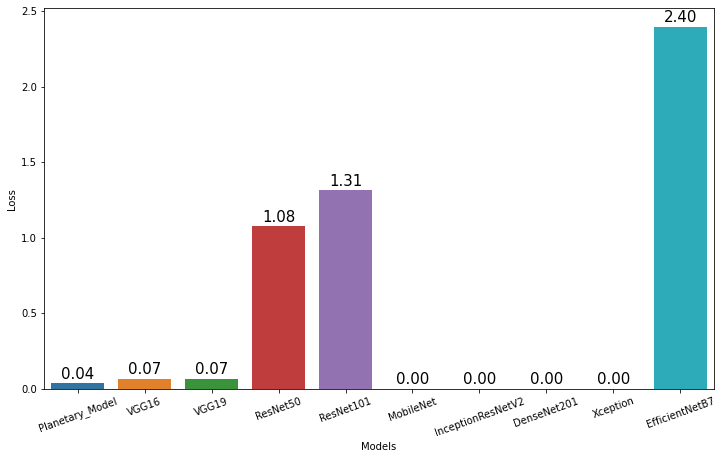

In [35]:
plt.figure(figsize=(12, 7))
plots = sns.barplot(x='Model', y='Loss', data=loss_table)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 9),
                   textcoords='offset points')

plt.xlabel("Models")
plt.ylabel("Loss")
plt.xticks(rotation=20);

## **Model Performance**


**Planetary Model vs result_VGG19**

In [36]:
rate = result_VGG19[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the VGG19 model.")

The Planetary Model that I created has a 1.807653219985468 times higher performance loss score than the VGG19 model.


**Planetary Model vs ResNet50**

In [37]:
rate = result_ResNet50[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the ResNet50 model.")

The Planetary Model that I created has a 28.927412671308016 times higher performance loss score than the ResNet50 model.


**Planetary Model vs ResNet101**

In [38]:
rate = result_ResNet101[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the ResNet101 model.")

The Planetary Model that I created has a 35.28201125755176 times higher performance loss score than the ResNet101 model.


**Planetary Model vs MobileNet**

In [39]:
rate = result_MobileNet[0]/result_model[0]
print(f"The Planetary Model that I  created has a {rate} times higher performance loss score than the MobileNet model.")

The Planetary Model that I  created has a 0.030338745007186533 times higher performance loss score than the MobileNet model.


**Planetary Model vs InResNetV2**

In [40]:
rate = result_InResNetV2[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the InResNetV2 model.")

The Planetary Model that I created has a 0.06946704830575455 times higher performance loss score than the InResNetV2 model.


**Planetary Model vs DenseNet201**

In [41]:
rate = result_DenseNet201[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the DenseNet201 model.")

The Planetary Model that I created has a 0.0393971704083384 times higher performance loss score than the DenseNet201 model.


**Planetary Model vs Xception**


In [42]:
rate = result_Xception[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the Xception model.")

The Planetary Model that I created has a 0.024052012673966918 times higher performance loss score than the Xception model.


**Planetary Model vs EfficientNetB7**

In [43]:
rate = result_Eff[0]/result_model[0]
print(f"The Planetary Model that I created has a {rate} times higher performance loss score than the EfficientNetB7 model.")

The Planetary Model that I created has a 64.34603312292354 times higher performance loss score than the EfficientNetB7 model.


## **Predictions**

In [85]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)

In [91]:
prediction_generator = prediction_datagen.flow_from_directory("/content/drive/MyDrive/Planetary image classifier/Test_image_Earth",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


## **Load to my model**

In [92]:
from tensorflow.keras.models import load_model

model = load_model("/content/model/model_48.h5")

## **Basic Model Prediction**

In [93]:
def prediction(model,data):
  prediction = model.predict(data)
  if prediction[0].max() == prediction[0][0]:
    print("Planet Prediction is 'Earth'!.Our home planet is the third planet from the Sun, and the only place we know of so far that’s inhabited by living things.\n While Earth is only the fifth largest planet in the solar system, it is the only world in our solar system with liquid water on the surface.\n Just slightly larger than nearby Venus, Earth is the biggest of the four planets closest to the Sun, all of which are made of rock and metal.The name Earth is at least 1,000 years old. \n All of the planets, except for Earth, were named after Greek and Roman gods and goddesses.\n However, the name Earth is a Germanic word, which simply means “the ground.”")
  elif prediction[0].max() == prediction[0][1]:
    print("Planet Prediction is 'Jupiter'! Jupiter has a long history of surprising scientists – all the way back to 1610 when Galileo Galilei found the first moons beyond Earth.\n That discovery changed the way we see the universe.Fifth in line from the Sun, Jupiter is, by far, the largest planet in the solar system – more than twice as massive as all the other planets combined.\n Jupiter's familiar stripes and swirls are actually cold, windy clouds of ammonia and water, floating in an atmosphere of hydrogen and helium.\n Jupiter’s iconic Great Red Spot is a giant storm bigger than Earth that has raged for hundreds of years. ")
  elif prediction[0].max() == prediction[0][2]:
    print("Dwarf Planet Prediction is 'Makemake'! Dwarf planet Makemake is a member of a group of objects that orbit in a disc-like zone beyond the orbit of Neptune called the Kuiper Belt.\n This distant realm is populated with thousands of miniature icy worlds, which formed early in the history of our solar system about 4.5 billion years ago.\n These icy, rocky bodies are called Kuiper Belt objects, transneptunian objects, or plutoids. ")
  elif prediction[0].max() == prediction[0][3]:
    print("Planet Prediction is 'Mars'!Mars is the fourth planet from the Sun – a dusty, cold, desert world with a very thin atmosphere.\n Mars is also a dynamic planet with seasons, polar ice caps, canyons, extinct volcanoes, and evidence that it was even more active in the past.Mars is one of the most explored bodies in our solar system, and it's the only planet where we've sent rovers to roam the alien landscape. ")
  elif prediction[0].max() == prediction[0][4]:
    print("Planet Prediction is 'Mercury'! The smallest planet in our solar system and nearest to the Sun, Mercury is only slightly larger than Earth's Moon.\n From the surface of Mercury, the Sun would appear more than three times as large as it does when viewed from Earth, and the sunlight would be as much as seven times brighter.\n  Despite its proximity to the Sun, Mercury is not the hottest planet in our solar system – that title belongs to nearby Venus, thanks to its dense atmosphere.\n Because of Mercury's elliptical – egg-shaped – orbit, and sluggish rotation, the Sun appears to rise briefly, set, and rise again from some parts of the planet's surface.\n The same thing happens in reverse at sunset. ")
  elif prediction[0].max() == prediction[0][5]:
    print("Moon Prediction is 'Moon'! Earth's Moon is the only place beyond Earth where humans have set foot.\n The brightest and largest object in our night sky, the Moon makes Earth a more livable planet by moderating our home planet's wobble on its axis, leading to a relatively stable climate.\n The Moon was likely formed after a Mars-sized body collided with Earth.Earth's only natural satellite is simply called - The Moon; because people didn't know other moons existed until Galileo Galilei discovered four moons orbiting Jupiter in 1610.")
  elif prediction[0].max() == prediction[0][6]:
    print("Planet Prediction is 'Neptune'! Dark, cold, and whipped by supersonic winds, ice giant Neptune is the eighth and most distant planet in our solar system.\n More than 30 times as far from the Sun as Earth, Neptune is the only planet in our solar system not visible to the naked eye and the first predicted by mathematics before its discovery.\n In 2011 Neptune completed its first 165-year orbit since its discovery in 1846.\n NASA's Voyager 2 is the only spacecraft to have visited Neptune up close. It flew past in 1989 on its way out of the solar system.")
  elif prediction[0].max() == prediction[0][7]:
    print("Dwarf Planet Prediction is 'Pluto'! Pluto is a dwarf planet in the Kuiper Belt, a donut-shaped region of icy bodies beyond the orbit of Neptune. \n There may be millions of these icy objects, collectively referred to as Kuiper Belt objects (KBOs) or trans-Neptunian objects (TNOs), in this distant region of our solar system.\n Pluto – which is smaller than Earth’s Moon – has a heart-shaped glacier that’s the size of Texas and Oklahoma. This fascinating world has blue skies, spinning moons, mountains as high as the Rockies, and it snows – but the snow is red.")
  elif prediction[0].max() == prediction[0][8]:
    print("Planet Prediction is 'Saturn'! Saturn is the sixth planet from the Sun and the second-largest planet in our solar system.\n Adorned with thousands of beautiful ringlets, Saturn is unique among the planets. It is not the only planet to have rings – made of chunks of ice and rock – but none are as spectacular or as complicated as Saturn's.\n Like fellow gas giant Jupiter, Saturn is a massive ball made mostly of hydrogen and helium. ")
  elif prediction[0].max() == prediction[0][9]:
    print("Planet Prediction is 'Uranus'! Uranus is the seventh planet from the Sun, and has the third-largest diameter in our solar system. \n It was the first planet found with the aid of a telescope, Uranus was discovered in 1781 by astronomer William Herschel, although he originally thought it was either a comet or a star.\n Uranus is made of water, methane, and ammonia fluids above a small rocky center. Its atmosphere is made of hydrogen and helium like Jupiter and Saturn, but it also has methane.\n The methane makes Uranus blue.Uranus also has faint rings. The inner rings are narrow and dark. The outer rings are brightly colored and easier to see.")
  elif prediction[0].max() == prediction[0][10]:
    print("Planet Prediction is 'Venus'! Venus is the second planet from the Sun and Earth’s closest planetary neighbor.\n  Even though Mercury is closer to the Sun, Venus is the hottest planet in our solar system. Its thick atmosphere is full of the greenhouse gas carbon dioxide, and it has clouds of sulfuric acid. The atmosphere traps heat, making it feel like a furnace on the surface. \n It’s so hot on Venus, the metal lead would melt.Venus is sometimes called Earth’s twin because it’s similar in size and structure, but the planets are very different in other ways.\n In addition to being extremely hot, Venus is unusual because it spins in the opposite direction of Earth and most other planets. It also has a very slow rotation making its day longer than its year.")

## **Predict as per data**

In [94]:
prediction(model,prediction_generator)

Planet Prediction is 'Earth'!.Our home planet is the third planet from the Sun, and the only place we know of so far that’s inhabited by living things.
 While Earth is only the fifth largest planet in the solar system, it is the only world in our solar system with liquid water on the surface.
 Just slightly larger than nearby Venus, Earth is the biggest of the four planets closest to the Sun, all of which are made of rock and metal.The name Earth is at least 1,000 years old. 
 All of the planets, except for Earth, were named after Greek and Roman gods and goddesses.
 However, the name Earth is a Germanic word, which simply means “the ground.”


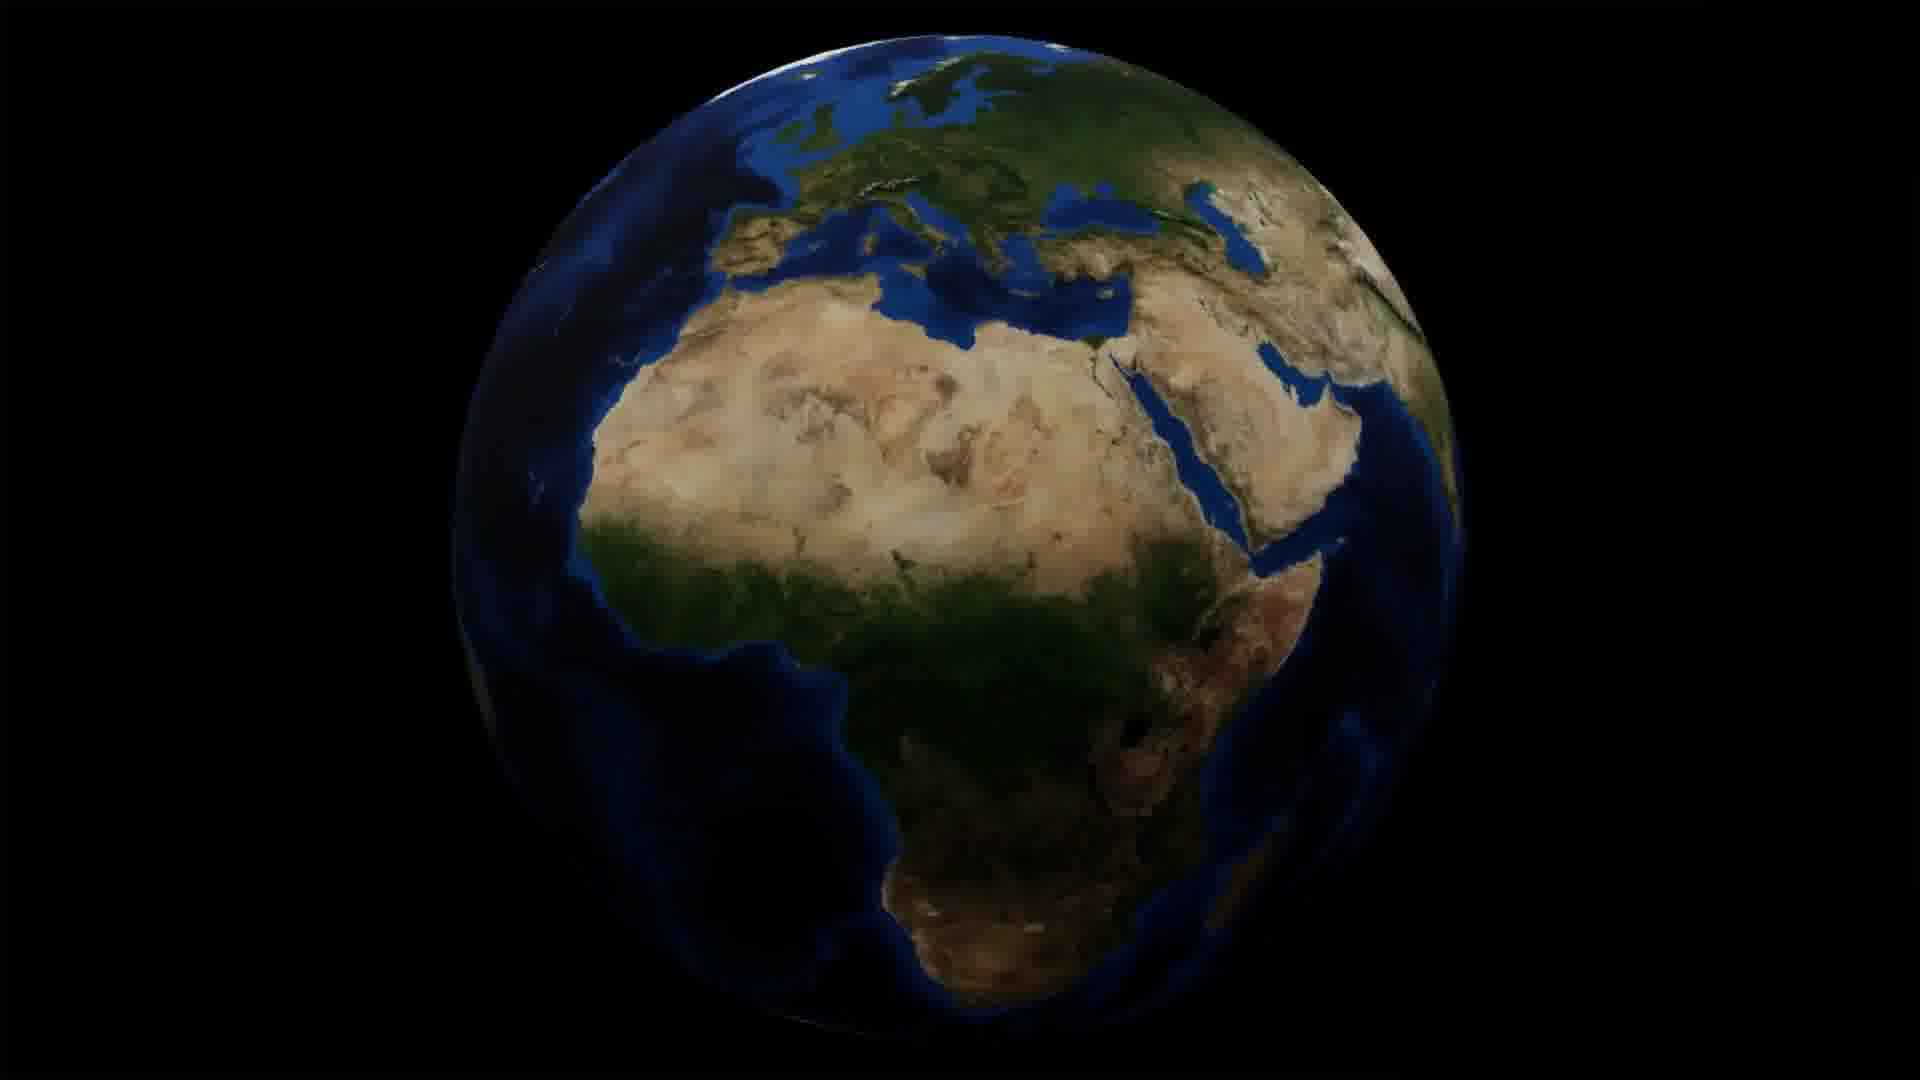

In [95]:
from PIL import Image
Image.open("/content/drive/MyDrive/Planetary image classifier/Test_image_Earth/Earth/Earth.jpg")


In [96]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)

In [97]:
prediction_generator = prediction_datagen.flow_from_directory("/content/drive/MyDrive/Planetary image classifier/Test_image_Mars",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


In [98]:
prediction(model,prediction_generator)

Planet Prediction is 'Mars'!Mars is the fourth planet from the Sun – a dusty, cold, desert world with a very thin atmosphere.
 Mars is also a dynamic planet with seasons, polar ice caps, canyons, extinct volcanoes, and evidence that it was even more active in the past.Mars is one of the most explored bodies in our solar system, and it's the only planet where we've sent rovers to roam the alien landscape. 


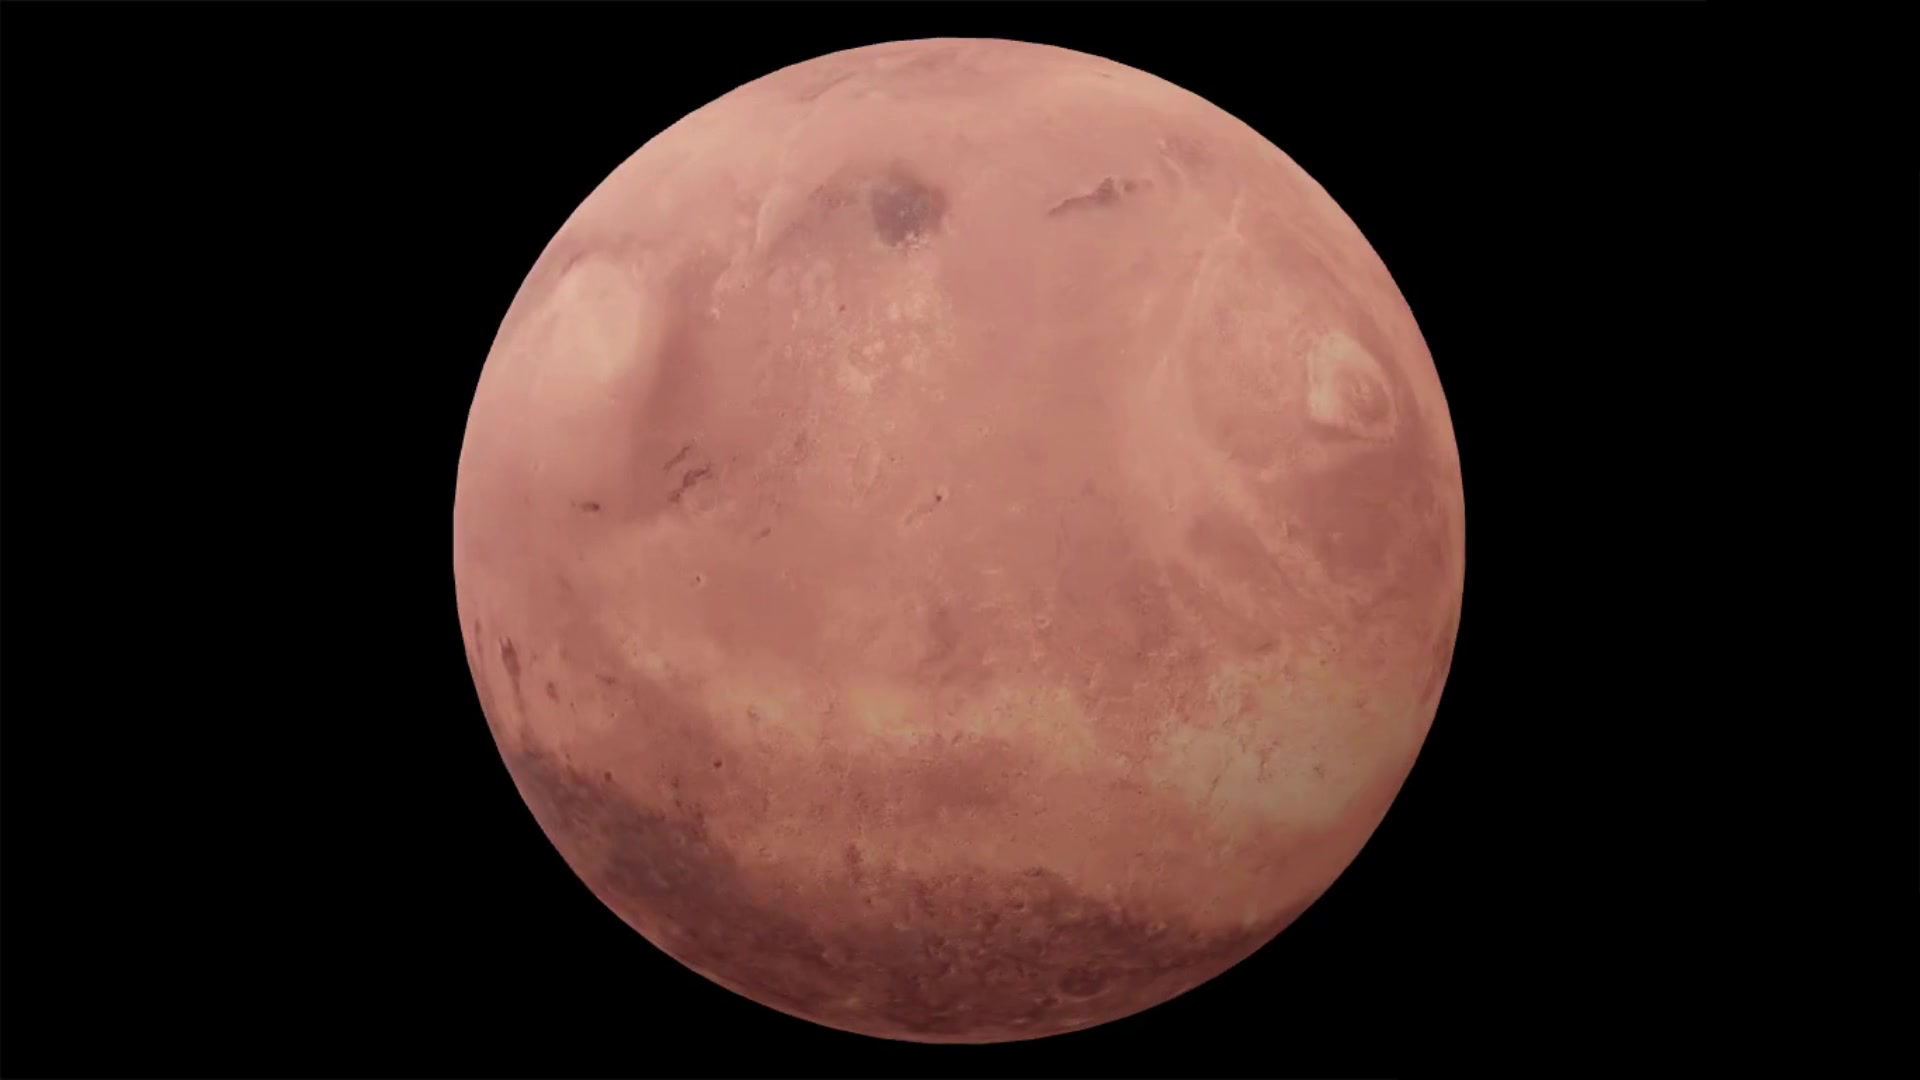

In [99]:
from PIL import Image
Image.open("/content/drive/MyDrive/Planetary image classifier/Test_image_Mars/Mars/Mars.jpg")


In [100]:
prediction_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    dtype=None)

In [101]:
prediction_generator = prediction_datagen.flow_from_directory("/content/drive/MyDrive/Planetary image classifier/Test_image_Jupiter",target_size=(256, 256),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    interpolation="lanczos")

Found 1 images belonging to 1 classes.


In [102]:
prediction(model,prediction_generator)

Planet Prediction is 'Jupiter'! Jupiter has a long history of surprising scientists – all the way back to 1610 when Galileo Galilei found the first moons beyond Earth.
 That discovery changed the way we see the universe.Fifth in line from the Sun, Jupiter is, by far, the largest planet in the solar system – more than twice as massive as all the other planets combined.
 Jupiter's familiar stripes and swirls are actually cold, windy clouds of ammonia and water, floating in an atmosphere of hydrogen and helium.
 Jupiter’s iconic Great Red Spot is a giant storm bigger than Earth that has raged for hundreds of years. 


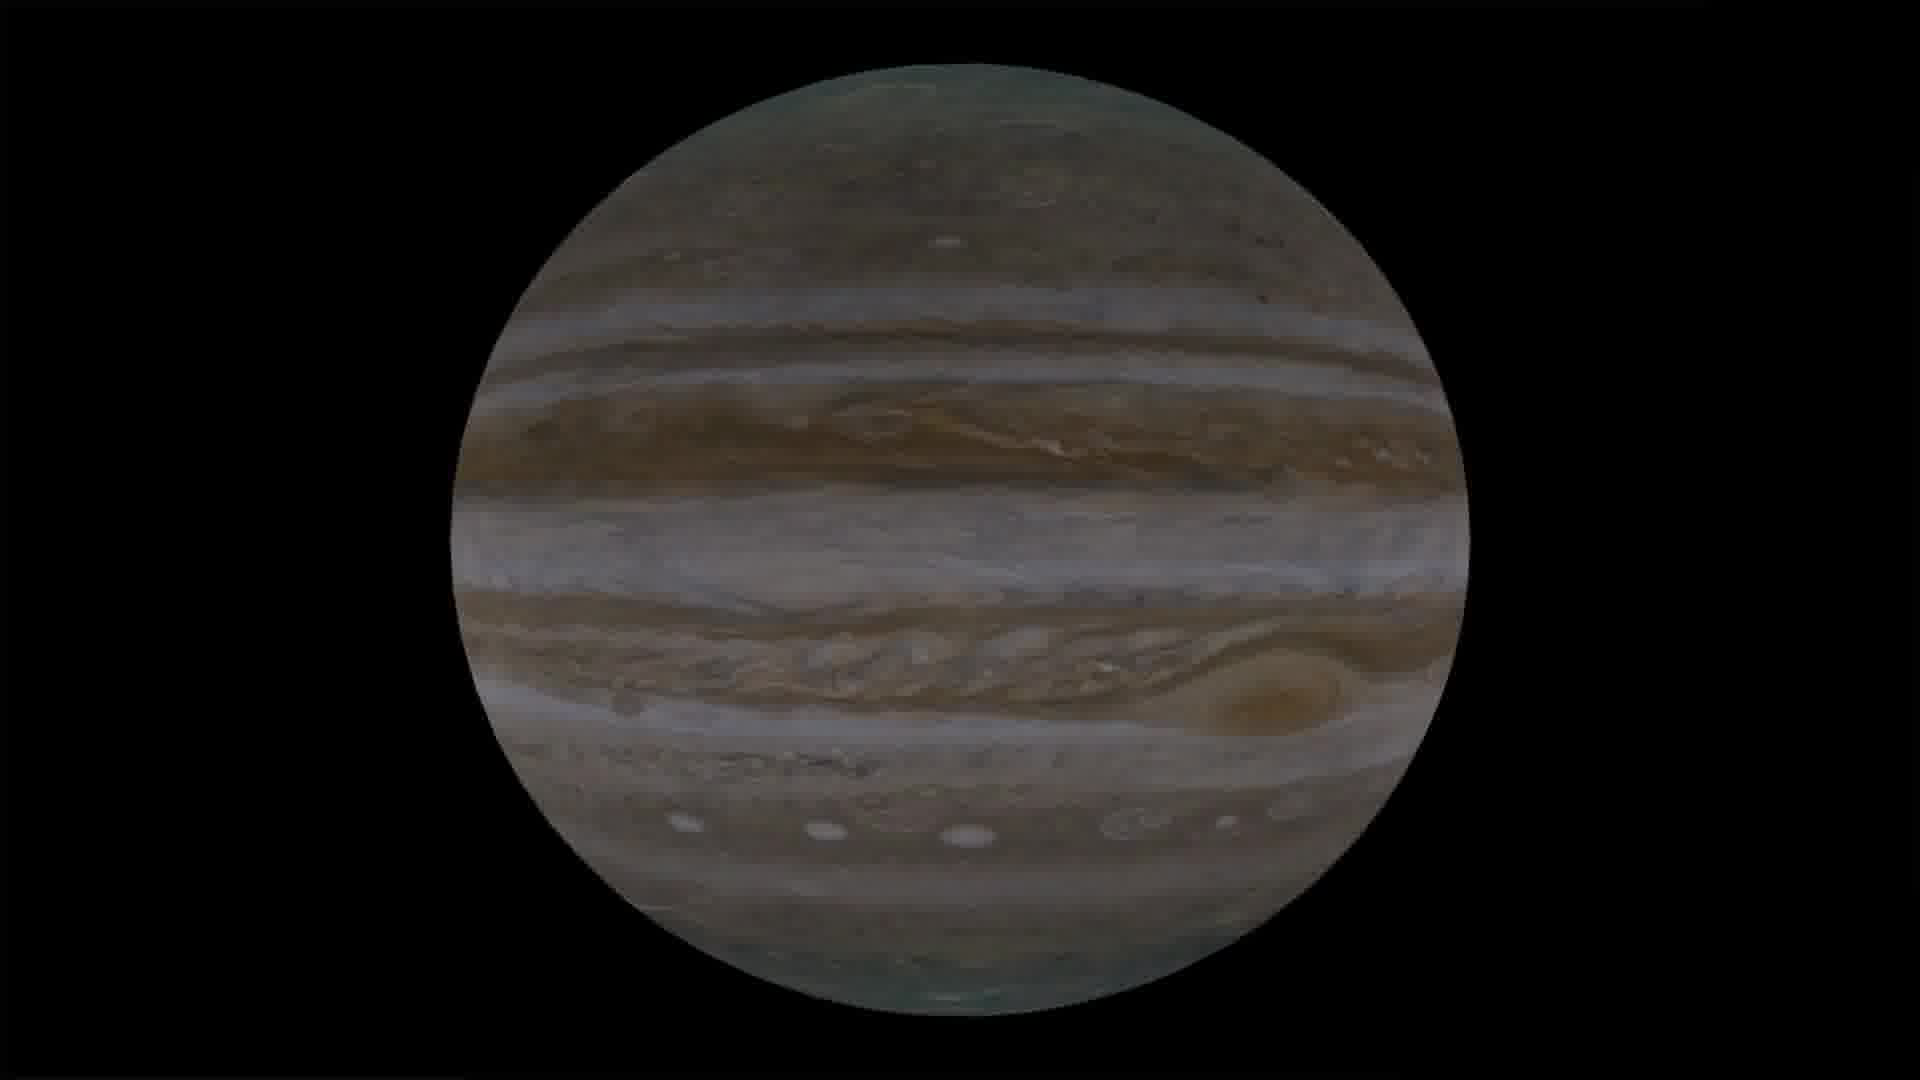

In [103]:
from PIL import Image
Image.open("/content/drive/MyDrive/Planetary image classifier/Test_image_Jupiter/Jupiter/Jupiter.jpg")
